<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Uts/Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo


Lima baris pertama dataset:
   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3         

<ipython-input-2-1c45595c9e5d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=data, palette="pastel")


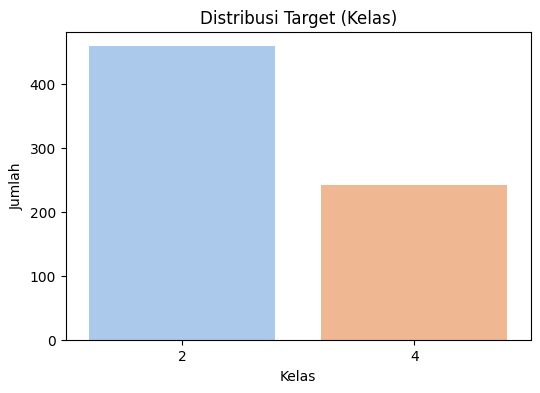

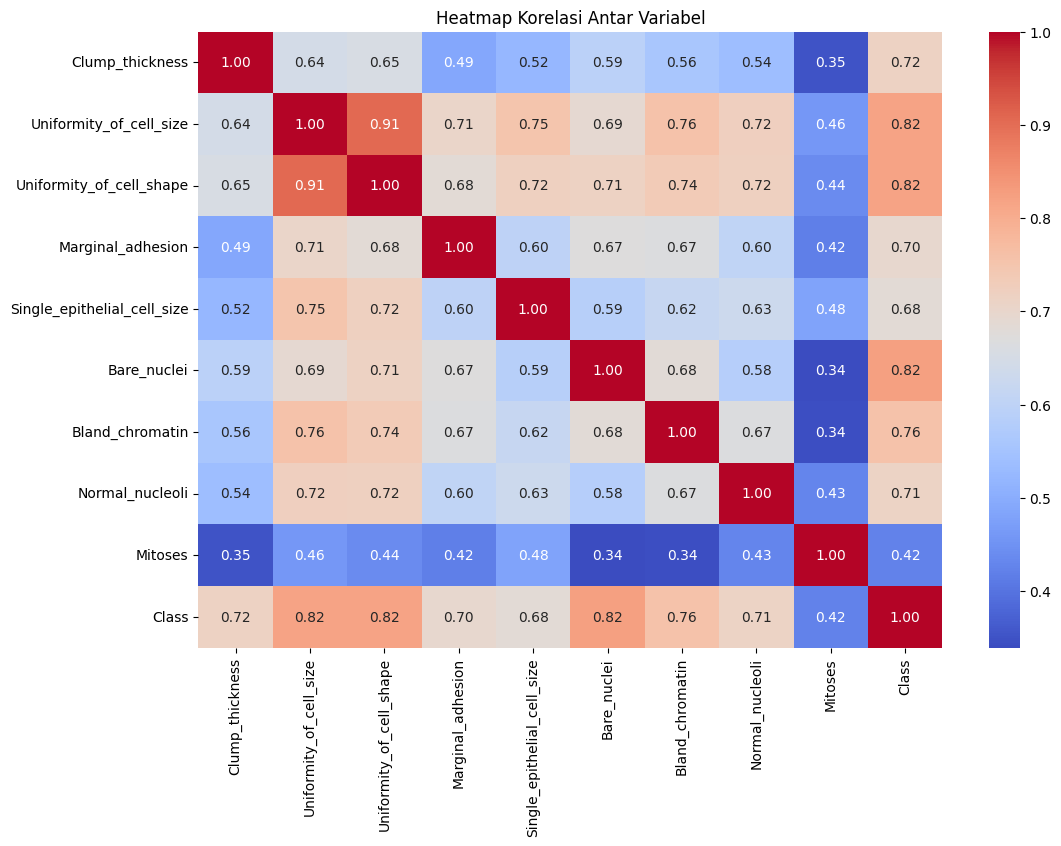

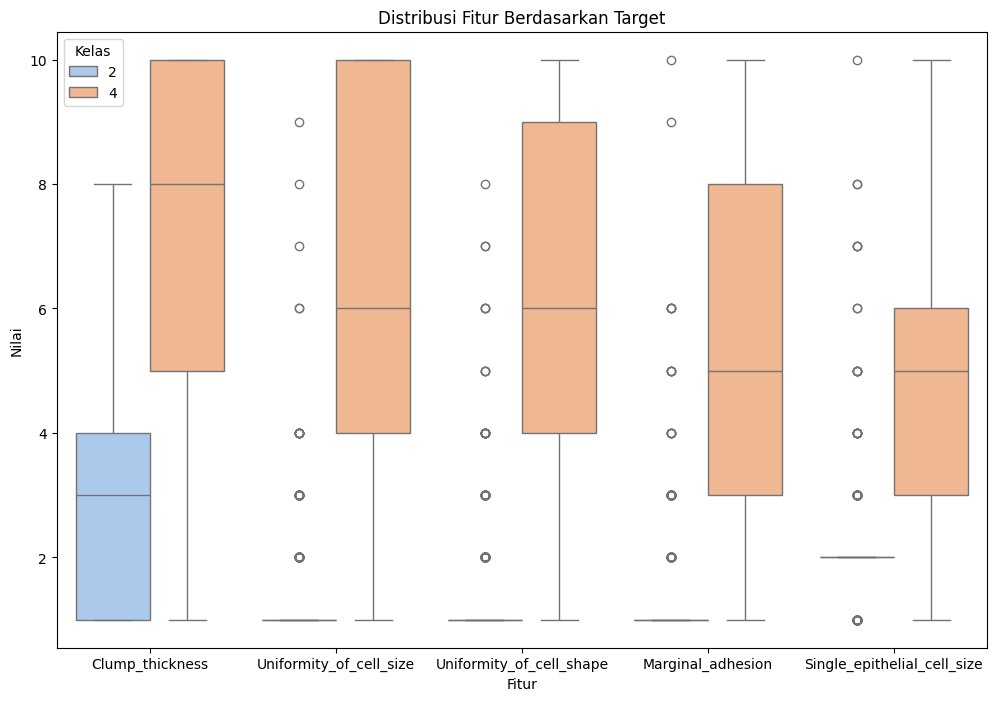

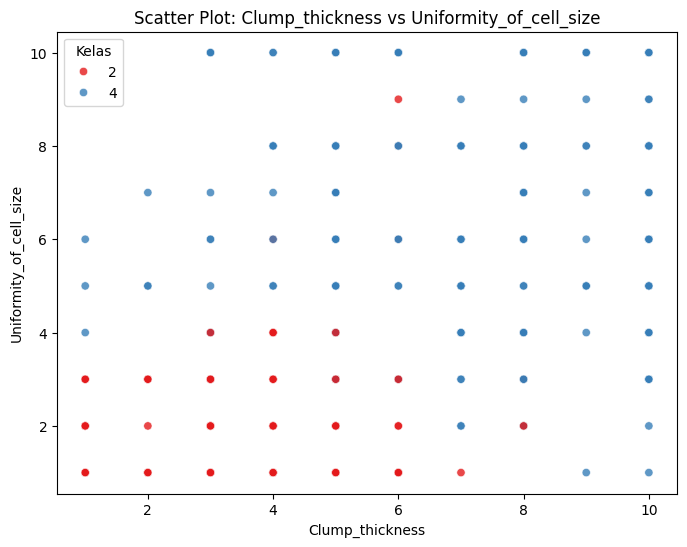

In [2]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# Data sebagai pandas dataframe
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Mendapatkan nama kolom target
target_column = y.columns[0]  # Mengambil nama kolom pertama pada DataFrame y

# Menggabungkan fitur dan target ke dalam satu dataframe
data = pd.concat([X, y], axis=1)

# Menampilkan 5 baris pertama dataset
print("\nLima baris pertama dataset:")
print(data.head())

# Menampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
print(data.info())

print("\nStatistik deskriptif dataset:")
print(data.describe())

# Menampilkan jumlah data per kelas pada target
print("\nDistribusi target:")
print(data[target_column].value_counts())

# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=data, palette="pastel")
plt.title("Distribusi Target (Kelas)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# Visualisasi distribusi beberapa fitur (contoh: fitur pertama hingga kelima)
features_to_plot = X.columns[:5]  # Pilih fitur untuk divisualisasikan
data_melted = data.melt(id_vars=target_column, value_vars=features_to_plot, var_name="Feature", value_name="Value")

plt.figure(figsize=(12, 8))
sns.boxplot(x="Feature", y="Value", hue=target_column, data=data_melted, palette="pastel")
plt.title("Distribusi Fitur Berdasarkan Target")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.legend(title="Kelas")
plt.show()

# Scatter plot antara dua fitur dengan warna berdasarkan target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.columns[0], y=X.columns[1], hue=target_column, data=data, palette="Set1", alpha=0.8)
plt.title(f"Scatter Plot: {X.columns[0]} vs {X.columns[1]}")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title="Kelas")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Laporan Evaluasi:
              precision    recall  f1-score   support

           2       0.96      0.97      0.96        92
           4       0.94      0.92      0.93        48

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140


Parameter Terbaik:
{'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


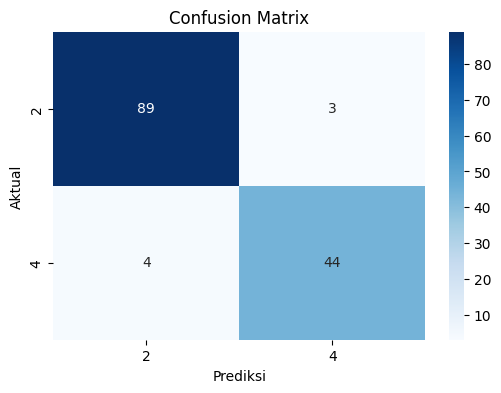

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y[target_column], test_size=0.2, random_state=42, stratify=y[target_column]
)

# Membuat pipeline
def create_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Imputasi missing values
        ('scaler', StandardScaler()),                # Normalisasi fitur
        ('classifier', model)                        # Model klasifikasi
    ])

# Hyperparameter yang akan dicari
param_grid = [
    {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],  # Regularisasi l1/l2
        'classifier__solver': ['liblinear']  # Solver untuk l1/l2
    },
    {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['elasticnet'],  # Regularisasi elasticnet
        'classifier__solver': ['saga'],         # Hanya saga mendukung elasticnet
        'classifier__l1_ratio': [0.1, 0.5, 0.9] # Ratio untuk elasticnet
    }
]

# Membuat pipeline dengan Logistic Regression
pipeline = create_pipeline(LogisticRegression(max_iter=1000, random_state=42))

# Hyperparameter tuning menggunakan GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    error_score='raise'  # Untuk debugging jika terjadi error
)

# Melatih model
grid.fit(X_train, y_train)

# Model terbaik
best_model = grid.best_estimator_

# Prediksi pada data uji
y_pred = best_model.predict(X_test)

# Evaluasi performa model
print("\nLaporan Evaluasi:")
print(classification_report(y_test, y_pred))

# Menampilkan parameter terbaik
print("\nParameter Terbaik:")
print(grid.best_params_)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Laporan Evaluasi:
              precision    recall  f1-score   support

           2       0.91      0.97      0.94        92
           4       0.93      0.81      0.87        48

    accuracy                           0.91       140
   macro avg       0.92      0.89      0.90       140
weighted avg       0.92      0.91      0.91       140


Parameter Terbaik:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}


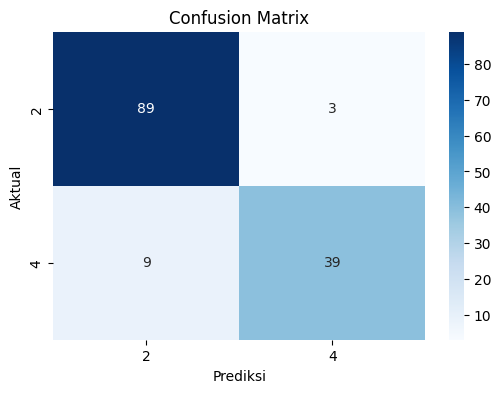

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y[target_column], test_size=0.2, random_state=42, stratify=y[target_column]
)

# Membuat pipeline
def create_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Imputasi missing values
        ('scaler', StandardScaler()),                # Normalisasi fitur
        ('classifier', model)                        # Model klasifikasi
    ])

# Hyperparameter yang akan dicari
param_grid = {
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],  # Fungsi impurity
    'classifier__max_depth': [None, 5, 10, 20],               # Kedalaman maksimal
    'classifier__min_samples_split': [2, 5, 10],             # Minimum sampel untuk split
    'classifier__min_samples_leaf': [1, 2, 4],               # Minimum sampel di daun
    'classifier__max_features': [None, 'sqrt', 'log2'],      # Jumlah fitur yang dipertimbangkan
}

# Membuat pipeline dengan Decision Tree
pipeline = create_pipeline(DecisionTreeClassifier(random_state=42))

# Hyperparameter tuning menggunakan GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Melatih model
grid.fit(X_train, y_train)

# Model terbaik
best_model = grid.best_estimator_

# Prediksi pada data uji
y_pred = best_model.predict(X_test)

# Evaluasi performa model
print("\nLaporan Evaluasi:")
print(classification_report(y_test, y_pred))

# Menampilkan parameter terbaik
print("\nParameter Terbaik:")
print(grid.best_params_)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Fitting 5 folds for each of 60 candidates, totalling 300 fits

Laporan Evaluasi:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        92
           4       0.92      0.92      0.92        48

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140


Parameter Terbaik:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'distance'}


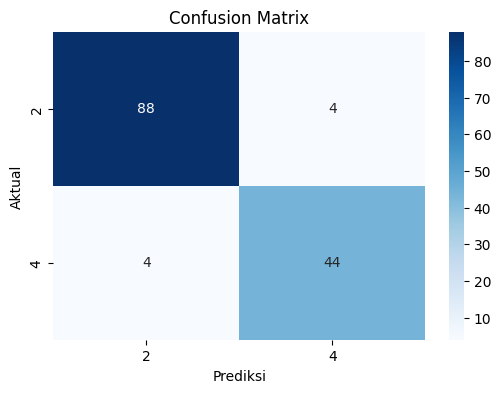

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y[target_column], test_size=0.2, random_state=42, stratify=y[target_column]
)

# Membuat pipeline
def create_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Imputasi missing values
        ('scaler', StandardScaler()),                # Normalisasi fitur
        ('classifier', model)                        # Model klasifikasi
    ])

# Hyperparameter yang akan dicari
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],       # Jumlah tetangga
    'classifier__weights': ['uniform', 'distance'],    # Metode pembobotan
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],  # Metode jarak
    'classifier__p': [1, 2],                           # Parameter untuk Minkowski
}

# Membuat pipeline dengan k-NN
pipeline = create_pipeline(KNeighborsClassifier())

# Hyperparameter tuning menggunakan GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Melatih model
grid.fit(X_train, y_train)

# Model terbaik
best_model = grid.best_estimator_

# Prediksi pada data uji
y_pred = best_model.predict(X_test)

# Evaluasi performa model
print("\nLaporan Evaluasi:")
print(classification_report(y_test, y_pred))

# Menampilkan parameter terbaik
print("\nParameter Terbaik:")
print(grid.best_params_)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Laporan Evaluasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Parameter Terbaik:
{'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}


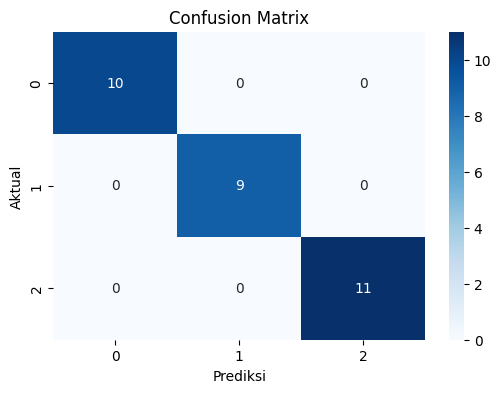

In [6]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset contoh (gunakan dataset Anda di sini)
data = load_iris()  # Misalnya menggunakan dataset Iris
X = data.data
y = data.target

# Split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Label Encoder (jika diperlukan)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Membuat pipeline dengan XGBoost
pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier())
])

# Menentukan parameter grid untuk hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# GridSearchCV untuk melakukan hyperparameter tuning
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

# Melatih model
grid.fit(X_train, y_train)

# Model terbaik
best_model = grid.best_estimator_

# Prediksi menggunakan model terbaik
y_pred = best_model.predict(X_test)

# Evaluasi performa model
print("\nLaporan Evaluasi:")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in label_encoder.classes_]))

# Menampilkan parameter terbaik
print("\nParameter Terbaik:")
print(grid.best_params_)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(cls) for cls in label_encoder.classes_], yticklabels=[str(cls) for cls in label_encoder.classes_])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Laporan Evaluasi:
              precision    recall  f1-score   support

           2       0.97      0.98      0.98       143
           4       0.95      0.94      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210


Parameter Terbaik:
{'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 100}


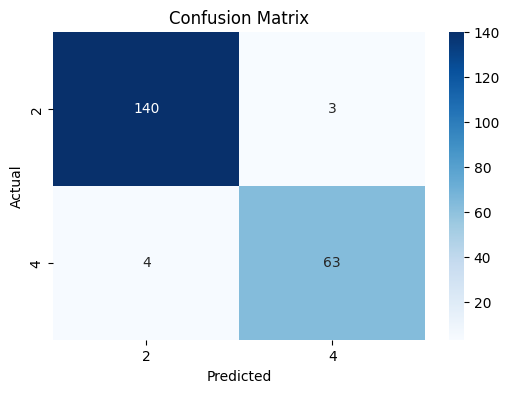

In [7]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil dataset dari ucimlrepo
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# Data dan target
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Mengencode label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Membuat pipeline dengan XGBoost
pipeline = Pipeline([
    ('xgb', xgb.XGBClassifier(eval_metric='mlogloss'))
])

# Hyperparameter tuning untuk XGBoost menggunakan GridSearchCV
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__n_estimators': [50, 100, 150]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Prediksi dengan model terbaik
y_pred = grid.best_estimator_.predict(X_test)

# Laporan evaluasi
print("\nLaporan Evaluasi:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in label_encoder.classes_]))

# Menampilkan parameter terbaik
print("\nParameter Terbaik:")
print(grid.best_params_)

# Matriks kebingungannya
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()